In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()

In [4]:
training = pd.read_csv('train.csv', index_col=0)
testing = pd.read_csv('test.csv', index_col=0)
training

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
# I'm curious what would happen if I trained the model now instead of after I finished everything so I'm going to try that
# I predict it's not going to be able to make sense of data like sex and cabin and I'll get an error
# Either that or a very bad score.
from sklearn.model_selection import train_test_split

In [6]:
Xtest = training [['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']]
ytest = training [['Survived']]

In [9]:
Xtest_train, Xtest_text, ytest_train, ytest_test = train_test_split(Xtest, ytest, test_size=0.1)

In [12]:
from sklearn.linear_model import LinearRegression
lrtest = LinearRegression()

In [13]:
lrtest.fit(Xtest_train, ytest_train)

ValueError: could not convert string to float: 'Sharp, Mr. Percival James R'

In [ ]:
# I'm leaving the error here.
# It's important to figure out why we do things the way we do.
# We can't skip straight to model building because computers can't parse information the way we do.
# In this case my computer didn't know what to do with a name. 
# I'm sure that would follow with other things too, but I've taken up enough time here.
# Now it's time to do things the way they're actually supposed to be done

In [8]:
training.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# Some of the information above isn't really helpful.
# No one 38% survived.
# Things like survival and class aren't numbers we can average. They're categorical.
# Other things like Age and Fare can tell us more. They're numerical.
# Let's separate numerical and categorical data so we can get rid of some of the noise
numdata = training[['Age','SibSp','Parch','Fare']]
catdata = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [29]:
numdata.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [11]:
# So the average age on the Titanic was a little more than twenty-nine and a half.
# The youngest kid wasn't even a year old.
# And the oldest person was 80.
# Most people didn't have a sibling or spouse on board.
# But at least one person had eight siblings (or spouses, but hopefully siblings).
# All interesting data.
# Let's look at some more number-based data.

In [30]:
training [["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [13]:
# So the average age on the Titanic was a little higher for men than women.

In [14]:
training.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [15]:
# So women across the board paid more regardless of which class they were in.
# Which is interesting, though maybe not important for our goal
# Let's look at something else for a second and get back to numerical data later.

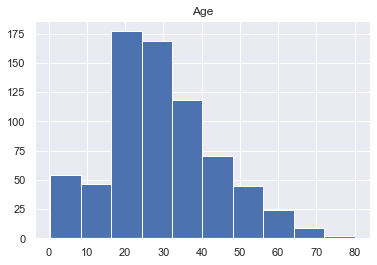

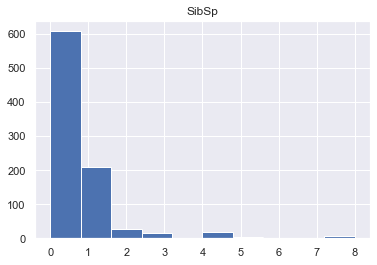

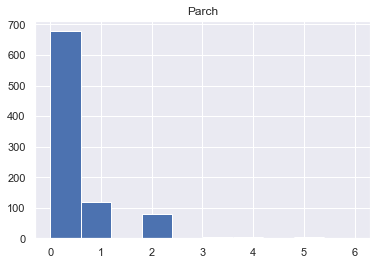

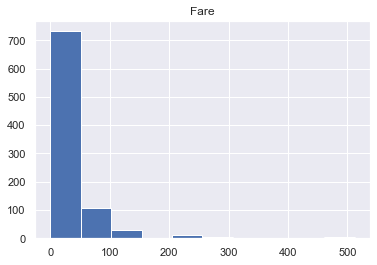

In [18]:
for i in numdata.columns:
    plt.hist(numdata[i])
    plt.title(i)
    plt.show()

In [17]:
# So there are so many zeros for SibSp, Parch, and fare it's hard for us to see much more than the 0
# So lets look at the numbers themselves.
# That way we're not relying on unlabled bars.

In [18]:
training ["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
# So most of the passengers did not have a spouse or sibling onboard
# Of those that did most only had one.
# There were five people who had five spouses or siblings - hopefully siblings.

In [1]:
training.groupby(["SibSp", "Pclass"])["Age"].mean()

NameError: name 'training' is not defined

In [21]:
# So it looks like the average ages for people with no siblings or spouse onboard were older than those with.
# And there was no one in first or second class with more than three siblings or a sibling/spouse combo of more than three.

In [22]:
training ["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
# So most people didn't have a parent or child onboard
# Let's see if we can figure out something for fare

In [19]:
farepaid = training [training ["Fare"] > 0]
farepaid.shape
plt

(876, 12)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

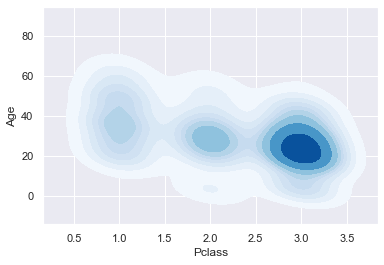

In [26]:
sns.kdeplot(x=training.Pclass, y=training.Age,cmap="Blues",shade=True)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

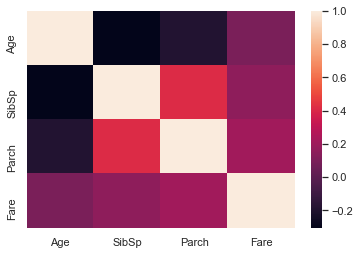

In [24]:
print(numdata.corr())
sns.heatmap(numdata.corr())

In [26]:
# Let's look at the other categorical data now.

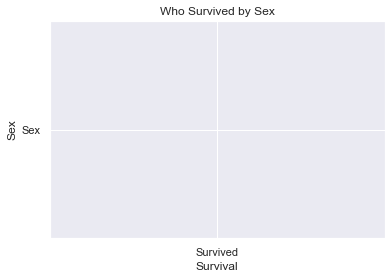

In [9]:
Survived = training [['Survived']]
Sex = training[['Sex']]

plt.bar("Survived","Sex")
plt.title('Who Survived by Sex')
plt.xlabel('Survival')
plt.ylabel('Sex')
plt.show()

In [31]:
training [training ["Name"].str.contains("Countess")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,the Countess


In [11]:
training [training ["Name"].str.contains("Mr.")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [12]:
training [training ["Name"].str.contains("Mrs")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [13]:
training [training ["Name"].str.contains("Miss")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [14]:
# This is ripped straight from Ken Jee's tutorial.
# It has the desired effect of getting rid of the name (something we proved earlier doesn't parse)
# And in turn making something parsable, ie Title.
training['Title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
# This seems to track because the values for Miss and Master are the same, but I'm curious about the missing four Mrs.s 
# The discrepancy between Mr makes sense, because mine is also counting Mrs.
# But my method got 129 Mrs.s and this got 125.
# Maybe some of them included two, like Lady Mrs or Mme Mrs. Let's test and take a look.

In [38]:
training [training ["Name"].str.contains("Mme")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,Mme


In [39]:
training [training ["Name"].str.contains("Ms")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,NaN,S,Ms


In [41]:
training [training ["Name"].str.contains("Dr")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Miss
131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C,Mr
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S,Mrs
633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Dr
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr


In [42]:
training [training ["Name"].str.contains("Lady")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,C,Lady


In [43]:
training [training ["Name"].str.contains("Mlle")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle


In [ ]:
# There it is! Proof that there were some doubles the way that I did it.
# Mlle. Berthe Antonine Mayne would have been caught by Mlle and Mrs the way I did things
# The way that Ken Jee did it it looked for the title more directly.
# Title is after name, so he started after the comma after surname and stopped at the period
# Mine just looked for letters that were next to each other.
# Which is why there were also more Drs in my version, Drew has D and R next to each other so it picked that up.

In [ ]:
# Do categorical transforms on all data. 
#Usually we would use a transformer, but with this approach we can ensure that our traning and test data 
#have the same colums. We also may be able to infer something about the shape of the test data through this method. 
# I will stress, this is generally not recommend outside of a competition (use onehot encoder).

In [ ]:
# I am going to do that because I hope to put this on GitHub and I want potential employers to know I can do it right
# But trying to figure out if I can use the letters for where they embarked led to an interesting question

In [33]:
training [training ["Name"].str.contains("John Coffey")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


In [32]:
peopletitle= ([['Mr'], ['Mrs'], ['Miss'],['Master'], ['Dr'], ['Rev'], ['Col'], ['Mlle'], ['Major'], 
      ['Mme'], ['Capt'], ['the Countess'], ['Sir'], ['Jonkheer'], ['Don'], ['Ms'], ['Lady']])
#List = []
#arr=np.array(List)
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=str)
vec.fit_transform((training), peopletitle.toarray())

# ([['Mr'], ['Mrs'], ['Miss'],['Master'], ['Dr'], ['Rev'], ['Col'], ['Mlle'], ['Major'], 
                              # ['Mme'], ['Capt'], ['the Countess'], ['Sir'], ['Jonkheer'], ['Don'], ['Ms'], ['Lady']])

AttributeError: 'list' object has no attribute 'toarray'

In [ ]:
# Things that I want to do that I don't know how:
# Separate cabin letter and number, determine if berth affected survival, and if location on the berth affected survival
